In [1]:
! pip3 install ../ -q
from sps4lat import model as mod
from sps4lat import covariance as cov
from sps4lat import optimize as opti
import healpy as hp 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
freqs = np.array([50.,100.,150.,200.])
N = 4 
nside = 256
nwhite = freqs 
lmax = int(3.*nside-1.)
cl = mod.Sum(mod.WhiteNoise(ell=np.linspace(0,lmax,lmax+1),nu=freqs,nwhite=np.array([1.,2.,3.,4.])),
             mod.PowerLaw(ell=np.linspace(0,lmax,lmax+1),nu=freqs, nu_0=150.,ell_0=1000.,alpha=2.5,beta=3.5),
             mod.CMB(ell=np.linspace(0,lmax,lmax+1), nu=freqs, a_sed=np.array([1.,1.5,1.2,1.3]))).eval()
mp = hp.synfast((cl[:,0,0],cl[:,1,1],cl[:,2,2],cl[:,3,3],cl[:,0,1],cl[:,1,2],cl[:,2,3],cl[:,0,2],cl[:,1,3],cl[:,0,3]),
               nside = nside, new = True, verbose = False, pol=False)
for i,m in enumerate(mp):
    filename = '../data/test/maps/test_pl/{:d}GHz.fits'.format(int(freqs[i]))
    hp.write_map(filename, m, overwrite=True)
    

N_bins = 10
lmins = np.arange(0,lmax,N_bins)
lmaxs = np.arange(N_bins-1,lmax,N_bins)
if lmaxs[-1] >= lmins[-1]:
    lmaxs = lmaxs[:-1]
if lmaxs[-1] != lmax :
    lmaxs = np.append(lmaxs,lmax)
domain_list = [cov.Domain(lmin_i,lmax_i) for (lmin_i,lmax_i) in zip(lmins,lmaxs)]
len(domain_list)


77

In [3]:
test = cov.Experiment('test',lmax,freqs,domain_list,beams=None)

In [4]:
test.read_map_file('../data/test/maps/test_pl')

(77, 4, 4)


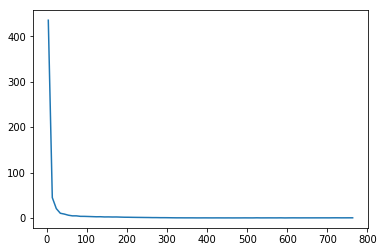

In [5]:
print(test.empirical_covmat.shape)
mat = test.empirical_covmat
ell_plot = np.array([dd.lmean for dd in test.domain_list])
factor = ell_plot*(ell_plot+1)/2/np.pi
plt.figure()
plt.plot(ell_plot, mat[:,1,3])
plt.show()

{'nu_0': 150, 'ell_0': 1000.0}
Optimization run on nwhite beta alpha a_sed
798.1502556702764
798.1502556702764
798.1502578658053
798.1502541834076
798.1502541574978
798.1502488824798
798.1502462791725
798.1502511437174
798.1502696000499
798.1502416242157
798.1502566443673
798.1502519929306
793.8333726516923
793.8333726516923
793.8333742445723
793.833371562373
793.8333667001169
793.8333700737923
793.8333681472194
793.8333700364186
793.8333481057771
793.8333824286777
793.8333673450626
793.8333710250532
785.1678300499726
785.1678300499726
785.1678316332111
785.167828967041
785.1678242015436
785.1678275022306
785.1678256029519
785.1678274580489
785.1678057375278
785.1678397802957
785.1678247766554
785.1678284445752
751.5726583044215
751.5726583044215
751.5726598497619
751.5726572469572
751.5726528533975
751.5726558740413
751.5726540787975
751.5726558035053
751.5726349019955
751.5726678501181
751.5726531603191
751.5726567807757
632.7896889408935
632.7896889408935
632.7896903418557
632.78968

1.807481476987956
1.8074814859849857
1.8074814909097618
1.8074814941152155
1.807481429421541
1.8074815147866108
1.8074814456343749
1.8074815161311903
1.7944858072166125
1.7944858072166125
1.7944857894868997
1.7944858166734319
1.7944858071364607
1.794485809753633
1.7944858186089396
1.794485815964883
1.7944857830869063
1.7944858346207857
1.7944857699878165
1.7944858209616736
1.7789321156070104
1.7789321156070104
1.7789321006637788
1.7789321237030142
1.778932122718051
1.7789321174702604
1.77893212780174
1.7789321217549476
1.7789321263609423
1.7789321304739047
1.7789320908807493
1.778932103922025
1.7627443621184353
1.7627443621184353
1.7627443507254759
1.7627443683882857
1.762744375623888
1.7627443635945026
1.7627443713389157
1.7627443662877553
1.762744402292947
1.7627443611572353
1.762744357223288
1.7627443290133336
1.748721634221126
1.748721634221126
1.7487216263975132
1.7487216386700695
1.7487216498333868
1.7487216357179989
1.7487216379399033
1.748721637414186
1.7487216868435622
1.74872

1.7276936554736722
1.7276936554736722
1.7276936554735887
1.7276936554737716
1.7276936554736535
1.7276936554736873
1.7276936554736517
1.7276936554736908
1.7276936554736269
1.727693655473792
1.727693655474047
1.727693655473658
1.7276936554739697
1.7276936554739697
1.727693655473753
1.7276936554738604
1.7276936554737201
1.727693655473745
1.7276936554736206
1.7276936554738196
1.7276936554736713
1.7276936554737432
1.7276936554739404
1.7276936554738578
1.7276936554736722
1.7276936554736722
1.7276936554735887
1.7276936554737716
1.7276936554736535
1.7276936554736873
1.7276936554736517
1.7276936554736908
1.7276936554736269
1.727693655473792
1.727693655474047
1.727693655473658
1.7276936554736722
1.7276936554736722
1.7276936554735887
1.7276936554737716
1.7276936554736535
1.7276936554736873
1.7276936554736517
1.7276936554736908
1.7276936554736269
1.727693655473792
1.727693655474047
1.727693655473658
1.7276936554738187
1.7276936554738187
1.7276936554736242
1.7276936554736562
1.7276936554737334
1.72

1.7276936554736269
1.727693655473792
1.727693655474047
1.727693655473658
1.7276936554736722
1.7276936554736722
1.7276936554735887
1.7276936554737716
1.7276936554736535
1.7276936554736873
1.7276936554736517
1.7276936554736908
1.7276936554736269
1.727693655473792
1.727693655474047
1.727693655473658
1.7276936554736722
1.7276936554736722
1.7276936554735887
1.7276936554737716
1.7276936554736535
1.7276936554736873
1.7276936554736517
1.7276936554736908
1.7276936554736269
1.727693655473792
1.727693655474047
1.727693655473658
1.7276936554736722
1.7276936554736722
1.7276936554735887
1.7276936554737716
1.7276936554736535
1.7276936554736873
1.7276936554736517
1.7276936554736908
1.7276936554736269
1.727693655473792
1.727693655474047
1.727693655473658
1.7276936554736722
1.7276936554736722
1.7276936554735887
1.7276936554737716
1.7276936554736535
1.7276936554736873
1.7276936554736517
1.7276936554736908
1.7276936554736269
1.727693655473792
1.727693655474047
1.727693655473658
1.7276936554736722
1.727693

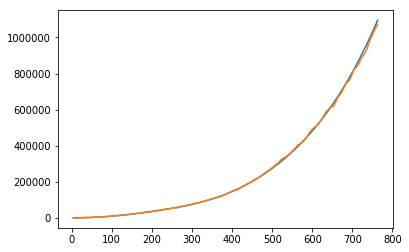

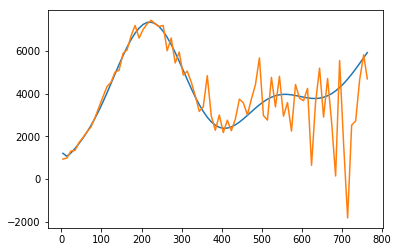

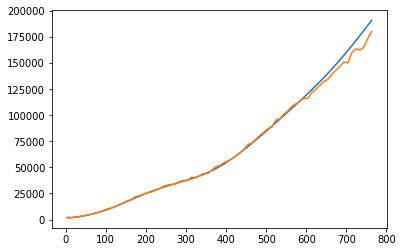

In [6]:
param_start = {'alpha':2.,'beta':3.,'nwhite' : np.ones(4), 'a_sed' : np.ones(4)}
mod_opt = mod.Sum(mod.WhiteNoise(), mod.PowerLaw(nu_0=150,ell_0=1000.), mod.CMB())
print(mod_opt.fixed_parameters)
param_optimised = opti.optimiser_test(experiment=test, model=mod_opt, param_start=param_start)
print(param_optimised)
cov_opt = mod_opt.eval(nu=test.freqs, ell=ell_plot,**param_optimised)
plt.figure()
plt.plot(ell_plot,factor*cov_opt[:,3,3])
plt.plot(ell_plot,factor*mat[:,3,3])
plt.figure()
plt.plot(ell_plot,factor*cov_opt[:,0,3])
plt.plot(ell_plot,factor*mat[:,0,3])
plt.figure()
plt.plot(ell_plot,factor*cov_opt[:,1,1])
plt.plot(ell_plot,factor*mat[:,1,1])
plt.show()